   iter      a         b       mid    f(mid)  derivative
0     0 -5.000  6.000000  0.500000  5.250000   -3.000000
1     1  0.500  6.000000  3.250000  4.562500    2.500000
2     2  0.500  3.250000  1.875000  3.015625   -0.250000
3     3  1.875  3.250000  2.562500  3.316406    1.125000
4     4  1.875  2.562500  2.218750  3.047852    0.437500
5     5  1.875  2.218750  2.046875  3.002197    0.093750
6     6  1.875  2.046875  1.960938  3.001526   -0.078125


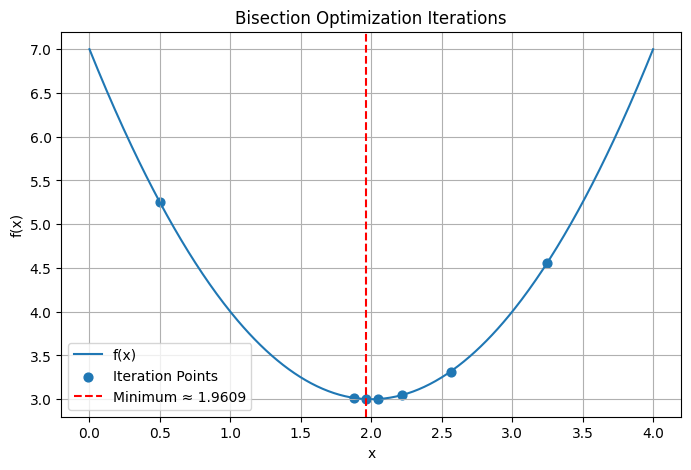

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def bisection_minimize(f, a, b, tol=1e-5, max_iter=7):
    """
    Bisection method for finding the minimum of a unimodal function f on [a, b].
    Uses derivative sign approximation.
    """
    iterations = []
    
    for k in range(max_iter):
        mid = (a + b) / 2

        # Approximate derivative using symmetric difference
        h = 1e-6
        derivative = (f(mid + h) - f(mid - h)) / (2*h)

        # Store iteration
        iterations.append({
            "iter": k,
            "a": a,
            "b": b,
            "mid": mid,
            "f(mid)": f(mid),
            "derivative": derivative
        })

        # Bisection update rule based on derivative sign
        if abs(derivative) < tol:
            break

        if derivative > 0:
            b = mid
        else:
            a = mid

        # Check interval length
        if abs(b - a) < tol:
            break

    return mid, pd.DataFrame(iterations)


# -----------------------------
# Example usage
# -----------------------------

# Define your function here
def f(x):
    return (x - 2)**2 + 3   # simple quadratic with min at x=2

# Run minimization
xmin, table = bisection_minimize(f, a=-5, b=6)

# Print iteration table
print(table)

# Plot function and iteration points
x_vals = np.linspace(-0, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="f(x)")
plt.scatter(table["mid"], table["f(mid)"], s=40, label="Iteration Points")
plt.axvline(x=xmin, color="r", linestyle="--", label=f"Minimum ≈ {xmin:.4f}")
plt.title("Bisection Optimization Iterations")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


Estimated minimum x = 2.9179606750063085, f(x) = 2.0067304508454207

Iteration table (last 10 rows):
 iter         a        b  interval_len        c        d     f(c)      f(d)
    1 -5.000000 10.00000     15.000000 0.729490 4.270510 7.155215  3.614195
    2  0.729490 10.00000      9.270510 4.270510 6.458980 3.614195 13.964545
    3  0.729490  6.45898      5.729490 2.917961 4.270510 2.006730  3.614195
    4  0.729490  4.27051      3.541020 2.082039 2.917961 2.842652  2.006730
    5  2.082039  4.27051      2.188471 2.917961 3.434588 2.006730  2.188867


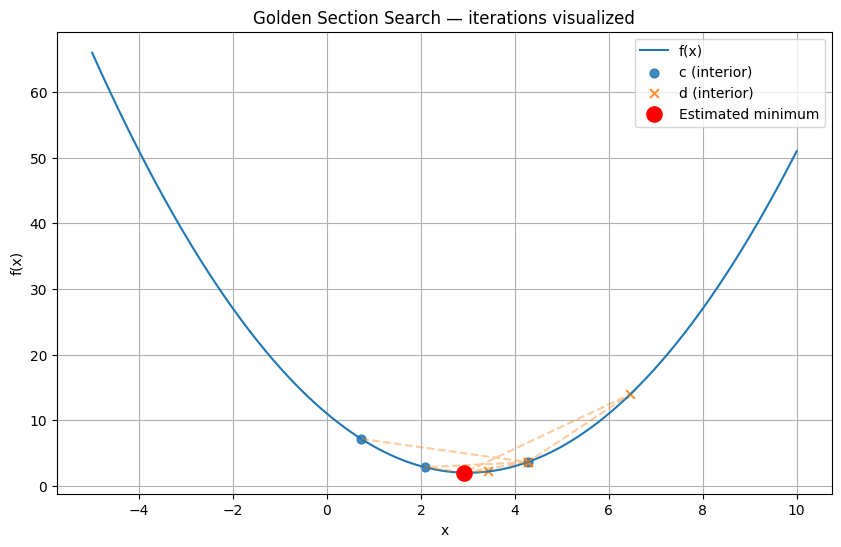

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def golden_section_search(f, a, b, tol=1e-6, max_iter=100):
    """
    Perform Golden Section Search to find the minimum of a 1D function f on [a, b].

    Returns:
      x_best: x-value of best found minimum
      f_best: f(x_best)
      history: pandas DataFrame with iteration details
    """
    # golden ratio constant (gr ≈ 0.618...)
    gr = (np.sqrt(5) - 1) / 2

    # initial interior points
    c = b - gr * (b - a)
    d = a + gr * (b - a)
    fc = f(c)
    fd = f(d)

    rows = []
    for i in range(1, max_iter + 1):
        rows.append({
            "iter": i,
            "a": a,
            "b": b,
            "interval_len": b - a,
            "c": c,
            "d": d,
            "f(c)": fc,
            "f(d)": fd
        })

        # stopping condition
        if (b - a) < tol:
            break

        # choose the subinterval that contains the minimum
        if fc < fd:
            # minimum is in [a, d]
            b = d
            # move d to c, then compute new c
            d = c
            fd = fc
            c = b - gr * (b - a)
            fc = f(c)
        else:
            # minimum is in [c, b]
            a = c
            # move c to d, then compute new d
            c = d
            fc = fd
            d = a + gr * (b - a)
            fd = f(d)

    # pick the best among the evaluated points and endpoints
    candidates = {
        a: f(a),
        b: f(b),
        c: fc,
        d: fd
    }
    x_best = min(candidates, key=candidates.get)
    f_best = candidates[x_best]

    history = pd.DataFrame(rows, columns=["iter", "a", "b", "interval_len", "c", "d", "f(c)", "f(d)"])
    return x_best, f_best, history

# ---------------------------
# Example usage & visualization
# ---------------------------

if __name__ == "__main__":
    # Test function: minimum at x = 3
    def f(x):
        return (x - 3)**2 + 2

    # Run search
    a0, b0 = -5.0, 10.0
    x_min, f_min, table = golden_section_search(f, a0, b0, tol=1e-8, max_iter=5)

    # Print results
    print(f"Estimated minimum x = {x_min}, f(x) = {f_min}")
    print("\nIteration table (last 10 rows):")
    print(table.tail(10).to_string(index=False))

    # Plot function and iteration points
    xs = np.linspace(a0, b0, 800)
    ys = f(xs)

    plt.figure(figsize=(10, 6))
    plt.plot(xs, ys, label="f(x)", linewidth=1.5)

    # Plot c and d points from history
    plt.scatter(table["c"], table["f(c)"], marker='o', label="c (interior)", s=40, alpha=0.85)
    plt.scatter(table["d"], table["f(d)"], marker='x', label="d (interior)", s=40, alpha=0.85)

    # Connect iteration points with faint line to show progression (optional)
    # We'll plot the sequence of chosen interior points by iteration (interleave c,d)
    seq_x = []
    seq_y = []
    for _, row in table.iterrows():
        seq_x.append(row["c"]); seq_y.append(row["f(c)"])
        seq_x.append(row["d"]); seq_y.append(row["f(d)"])
    plt.plot(seq_x, seq_y, linestyle='--', alpha=0.4)

    # Highlight best point
    plt.scatter([x_min], [f_min], color='red', s=120, label="Estimated minimum", zorder=5)
    plt.title("Golden Section Search — iterations visualized")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()


    Iteration         x         y    f(x, y)    grad_x     grad_y
0           0  3.000000  4.000000  43.000000  8.000000  11.000000
1           1  2.200000  2.900000  26.350000  6.400000   8.800000
2           2  1.560000  2.020000  15.694000  5.120000   7.040000
3           3  1.048000  1.316000   8.874160  4.096000   5.632000
4           4  0.638400  0.752800   4.509462  3.276800   4.505600
5           5  0.310720  0.302240   1.716056  2.621440   3.604480
6           6  0.048576 -0.058208  -0.071724  2.097152   2.883584
7           7 -0.161139 -0.346566  -1.215903  1.677722   2.306867
8           8 -0.328911 -0.577253  -1.948178  1.342177   1.845494
9           9 -0.463129 -0.761802  -2.416834  1.073742   1.476395
10         10 -0.570503 -0.909442  -2.716774  0.858993   1.181116
11         11 -0.656403 -1.027554  -2.908735  0.687195   0.944893
12         12 -0.725122 -1.122043  -3.031591  0.549756   0.755914
13         13 -0.780098 -1.197634  -3.110218  0.439805   0.604731
14        

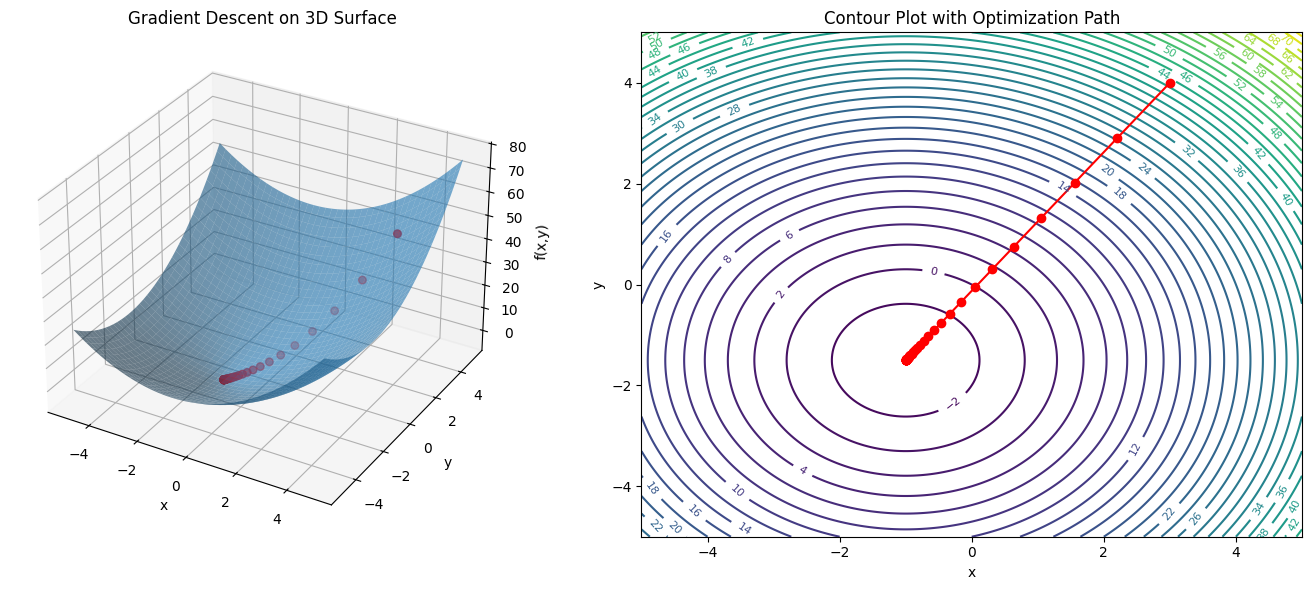

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------
# 1. Define the function f(x, y)
# ----------------------------
def f(x, y):
    return x**2 + y**2 + 2*x + 3*y  # Example; replace with any 2D function


# -----------------------------------------------------
# 2. Compute numerical gradient using finite differences
# -----------------------------------------------------
def numerical_gradient(f, x, y, h=1e-5):
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([df_dx, df_dy])


# ------------------------------------------
# 3. Gradient Descent Optimization Procedure
# ------------------------------------------
def gradient_descent(f, start, lr=0.1, iterations=30):
    x, y = start
    history = []

    for i in range(iterations):
        grad = numerical_gradient(f, x, y)
        history.append([i, x, y, f(x, y), grad[0], grad[1]])

        x -= lr * grad[0]
        y -= lr * grad[1]

    df = pd.DataFrame(history, columns=[
        "Iteration", "x", "y", "f(x, y)", "grad_x", "grad_y"
    ])
    return df


# Run optimizer
start_point = (3, 4)  # starting guess
lr = 0.1
iterations = 40

results = gradient_descent(f, start_point, lr, iterations)
print(results)


# ---------------------------------------
# 4. Plot the surface & iteration points
# ---------------------------------------
fig = plt.figure(figsize=(14, 6))

# --- 3D SURFACE PLOT ---
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

ax1.plot_surface(X, Y, Z, alpha=0.6, rstride=5, cstride=5, linewidth=0)
ax1.scatter(results["x"], results["y"], results["f(x, y)"], color="red", s=30)
ax1.set_title("Gradient Descent on 3D Surface")
ax1.set_xlabel("x"); ax1.set_ylabel("y"); ax1.set_zlabel("f(x,y)")

# --- 2D CONTOUR PLOT ---
ax2 = fig.add_subplot(1, 2, 2)
contours = ax2.contour(X, Y, Z, levels=50)
ax2.clabel(contours, inline=True, fontsize=8)
ax2.plot(results["x"], results["y"], marker="o", color="red")
ax2.set_title("Contour Plot with Optimization Path")
ax2.set_xlabel("x"); ax2.set_ylabel("y")

plt.tight_layout()
plt.show()


    Iteration         x         y     f(x,y)
0           0 -1.500000  1.500000  62.500000
1           1 -1.055664  1.646484  32.534301
2           2 -1.254253  1.515195   5.417552
3           3 -1.223545  1.525133   5.022945
4           4 -1.235958  1.516023   5.012895
5           5 -1.219159  1.508175   4.972303
6           6 -1.226852  1.497581   4.964625
7           7 -0.365847  0.247721   3.162338
8           8 -0.281596 -0.042552   3.127189
9           9 -0.281596 -0.042552   3.127189
10         10 -0.281596 -0.042552   3.127189
11         11  0.010824 -0.106829   2.122227
12         12  0.335647 -0.008523   1.909876
13         13  0.449633  0.082143   1.743559
14         14  0.849761  0.715259   0.027244
15         15  0.846409  0.718876   0.024199
16         16  0.849130  0.718829   0.023243
17         17  0.848606  0.719680   0.022941
18         18  0.852612  0.723573   0.022861
19         19  0.854635  0.726275   0.022833


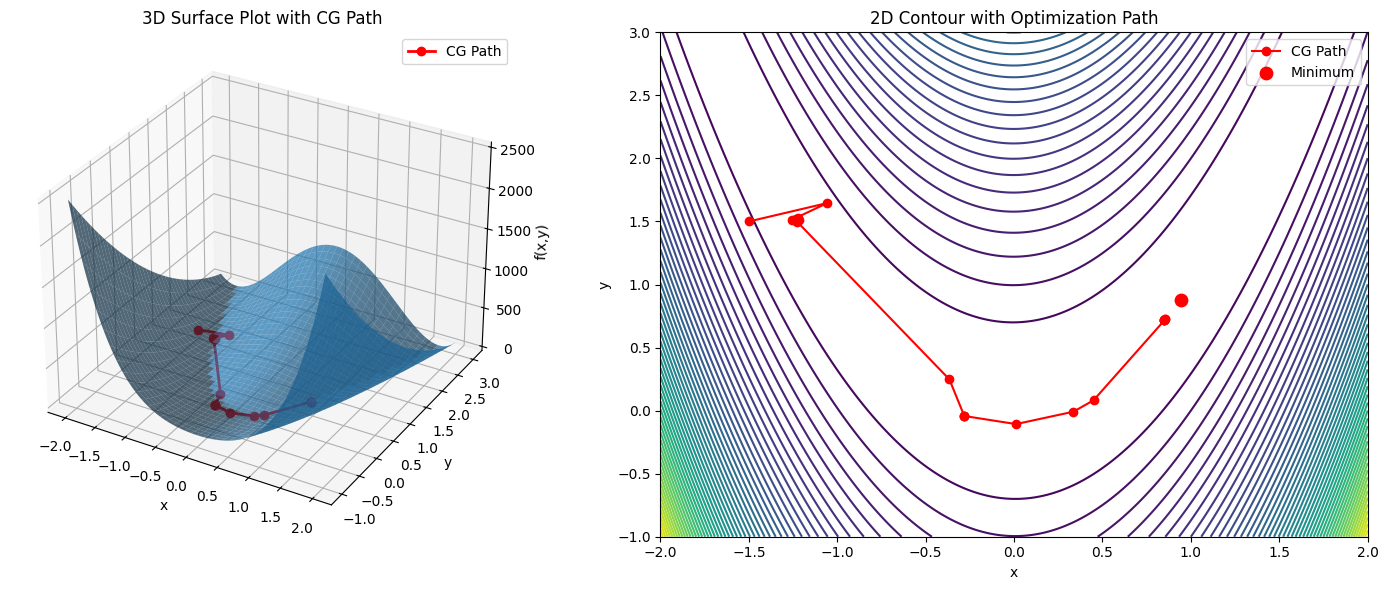

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------------------------------------
# User-defined function and gradient (EDIT THESE)
# ----------------------------------------------------------
def f(x):
    # Example: Rosenbrock function
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def grad_f(x):
    dfdx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    dfdy = 200 * (x[1] - x[0]**2)
    return np.array([dfdx, dfdy])


# ----------------------------------------------------------
# Line search (Armijo backtracking)
# ----------------------------------------------------------
def line_search(f, grad_f, x, d, alpha=1.0, rho=0.5, c=1e-4):
    fx = f(x)
    gradx = grad_f(x)
    while f(x + alpha * d) > fx + c * alpha * gradx.dot(d):
        alpha *= rho
    return alpha


# ----------------------------------------------------------
# Nonlinear Conjugate Gradient (Fletcher–Reeves)
# ----------------------------------------------------------
def nonlinear_cg(f, grad_f, x0, tol=1e-6, max_iter=20):
    x = x0
    g = grad_f(x)
    d = -g
    iterations = []

    for k in range(max_iter):
        iterations.append([k, x[0], x[1], f(x)])

        if np.linalg.norm(g) < tol:
            break

        alpha = line_search(f, grad_f, x, d)
        x_new = x + alpha * d
        g_new = grad_f(x_new)

        beta = g_new.dot(g_new) / g.dot(g)
        d = -g_new + beta * d

        x, g = x_new, g_new

    return x, iterations


# ----------------------------------------------------------
# Run optimization
# ----------------------------------------------------------
x0 = np.array([-1.5, 1.5])
xmin, iters = nonlinear_cg(f, grad_f, x0)

df = pd.DataFrame(iters, columns=["Iteration", "x", "y", "f(x,y)"])
print(df)

# Extract path
path = np.array([[row[1], row[2], row[3]] for row in iters])


# ----------------------------------------------------------
# Create grid for visualization
# ----------------------------------------------------------
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = (1 - X)**2 + 100*(Y - X**2)**2


# ----------------------------------------------------------
# SUBPLOTS: Contour + 3D Surface
# ----------------------------------------------------------
fig = plt.figure(figsize=(15, 6))

# ---------- Subplot 1: 2D Contour ----------
ax1 = fig.add_subplot(1, 2, 2)
ax1.contour(X, Y, Z, levels=50)
ax1.plot(path[:,0], path[:,1], 'o-r', label="CG Path")
ax1.scatter([xmin[0]], [xmin[1]], c='red', s=80, label="Minimum")
ax1.set_title("2D Contour with Optimization Path")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()

# ---------- Subplot 2: 3D Surface ----------
ax2 = fig.add_subplot(1, 2, 1, projection='3d')
ax2.plot_surface(X, Y, Z, alpha=0.7, rstride=10, cstride=10)
ax2.plot(path[:,0], path[:,1], path[:,2], 'r-o', linewidth=2, label="CG Path")
ax2.set_title("3D Surface Plot with CG Path")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("f(x,y)")
ax2.legend()

plt.tight_layout()
plt.show()
